<a href="https://colab.research.google.com/github/AndreMartins21/Analise-SISU-UFMG/blob/main/Analise_SISU_UFMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

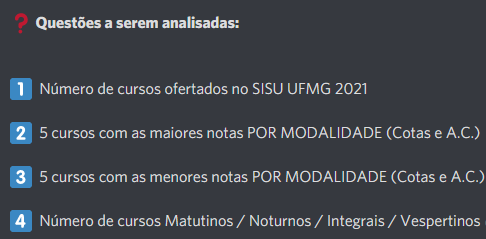

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataSet Kaggle/DF_SISU_UFMG.xlsx")

df.head()

,Unnamed: 0,Curso,Turno,Modalidade,Mínimo,Máximo
0,0,ADMINISTRAÇÃO,Matutino,1.1,520.04,520.04
1,1,ADMINISTRAÇÃO,Matutino,1.2,642.08,674.66
2,2,ADMINISTRAÇÃO,Matutino,2.1,649.12,649.12
3,3,ADMINISTRAÇÃO,Matutino,2.2,698.38,719.48
4,4,ADMINISTRAÇÃO,Matutino,3.1,559.88,559.88


# - ANALISANDO OS ARQUIVOS

## **1°: Número de cursos ofertados no SISU UFMG 2021**

In [8]:
num_cursos = df["Curso"].nunique()

print(f"Há {num_cursos} cursos ofertados no Sisu UFMG - 1° Edição")

Há 71 cursos ofertados no Sisu UFMG - 1° Edição


## **# Função que será usada nos tópicos 2 e 3:**

In [9]:
modalidades = df["Modalidade"].unique()

# ['1.1', '1.2', '2.1', '2.2', '3.1', '3.2', '4.2', 'Amplaconcorrência', '4.1']

def top_modalidade(tipo = "Máximo",ind = 0):
  '''
  Essa função tem como objetivo retornar dois valores:
  O primeiro trata-se de um data_frame do mínimo ou máximo (var TIPO) para a determina modalidade solicitada (var IND).
  O segundo valor retornado, será a modalidade, visto que ao chamar essa função, deve-se passar um número inteiro que irá iterar pela lista "modalidades",
  fazendo com que retorne o nome propriamente dito de tal modalidade.
  '''

  asc = False
  if tipo == "Mínimo":
    asc = True

  df_modal = df[df["Modalidade"] == modalidades[ind]]

  df_modal = df_modal.sort_values(tipo, ascending= asc, ignore_index= True).head()

  # Adicionar a sigla do turno em cada curso
  cursos = df_modal["Curso"].values
  turnos = list([x[:3] for x in df_modal["Turno"].values])
  new_cursos = []

  for i, v in enumerate(cursos):
    v = f"{v} ({turnos[i]})"
    new_cursos.append(v)
  
  df_modal["Curso"] = new_cursos

  return df_modal[["Curso", tipo]], modalidades[ind] # Retornará o DF com o curso e o máximo, além da modalidade

v, i = top_modalidade(tipo = "Máximo", ind = 4)

v

,Curso,Máximo
0,MEDICINA (Int),733.10
1,HISTÓRIA (Mat),666.26
2,FILOSOFIA (Mat),628.56
3,ODONTOLOGIA (Mat),624.46
4,DIREITO (Not),623.00


##  **2°: Cinco cursos com as maiores notas POR MODALIDADE (Cotas e A.C.)**

### Ampla Concorrência:

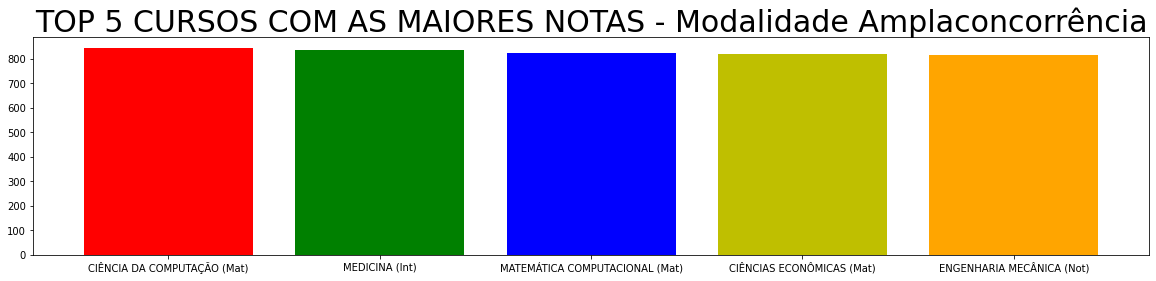

In [15]:
df_ac, mod = top_modalidade(ind= 7)

plt.figure(figsize=(20, 4))
plt.bar(df_ac["Curso"], df_ac["Máximo"], color = ["r", "g", "b", "y", "orange"])
plt.title(f"TOP 5 CURSOS COM AS MAIORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

### Cotas:

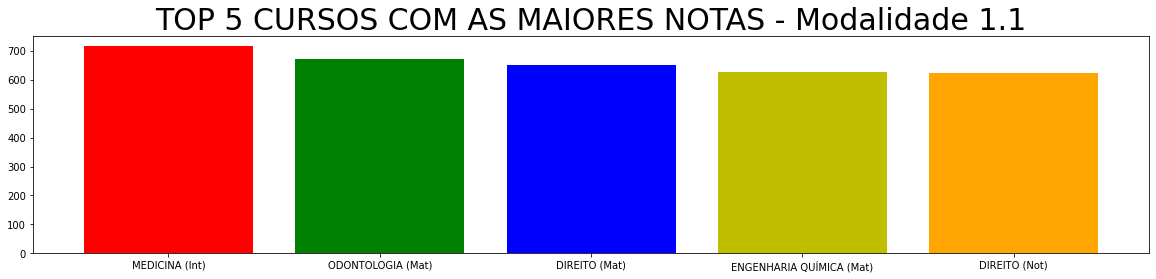

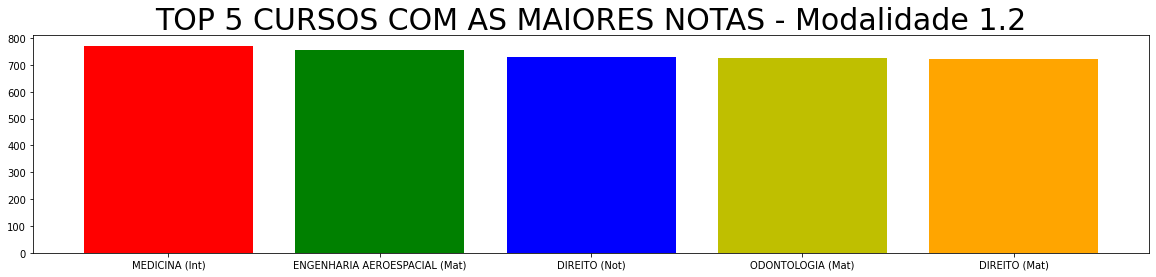

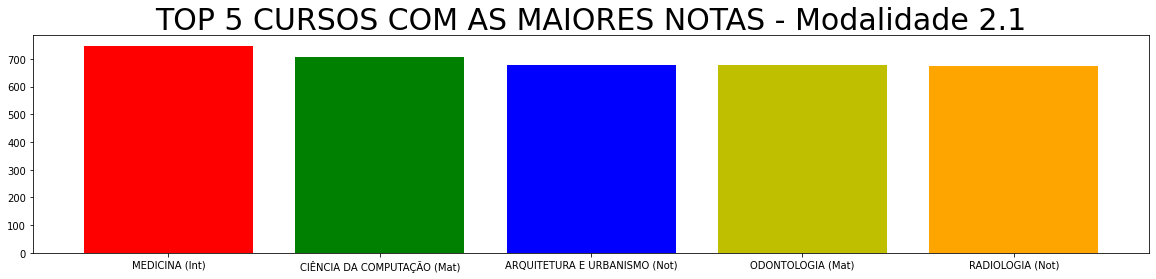

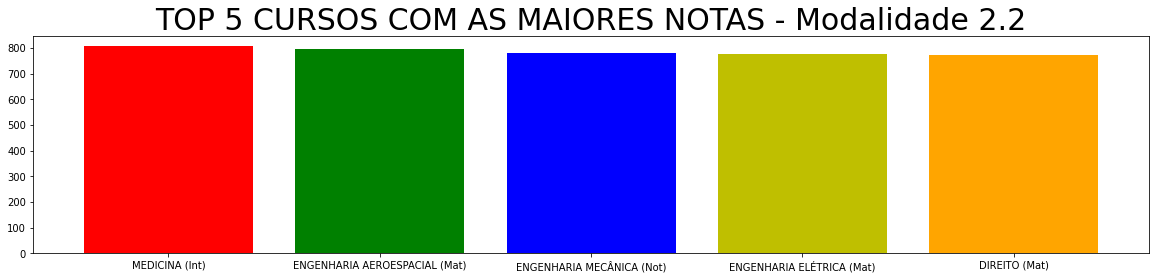

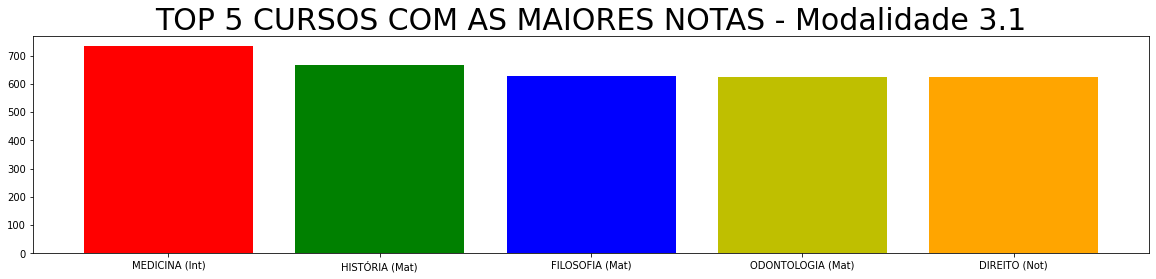

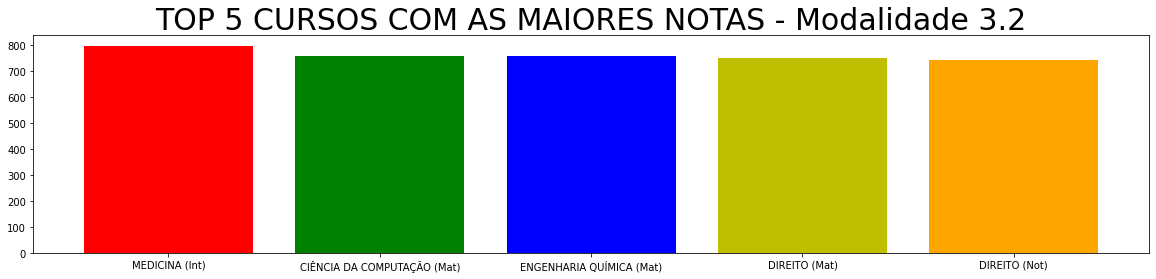

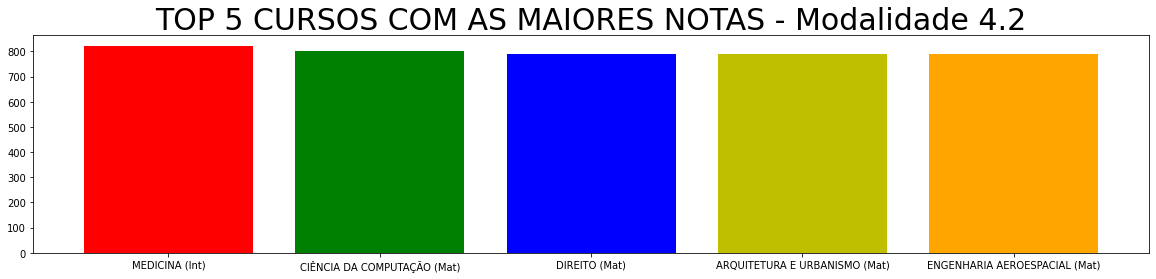

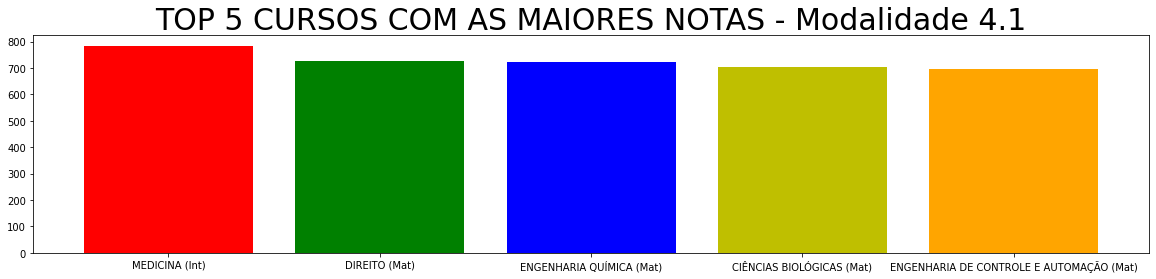

In [18]:
for cont in range(len(modalidades)):
  if cont != 7:
    df_11, mod = top_modalidade(tipo= "Máximo", ind = cont)

    plt.figure(figsize=(20, 4))
    plt.bar(df_11["Curso"], df_11["Máximo"], color = ["r", "g", "b", "y", "orange"])
    plt.title(f"TOP 5 CURSOS COM AS MAIORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

##

## **3°: Cinco cursos com as menores notas POR MODALIDADE (Cotas e A.C.)**

### Ampla Concorrência

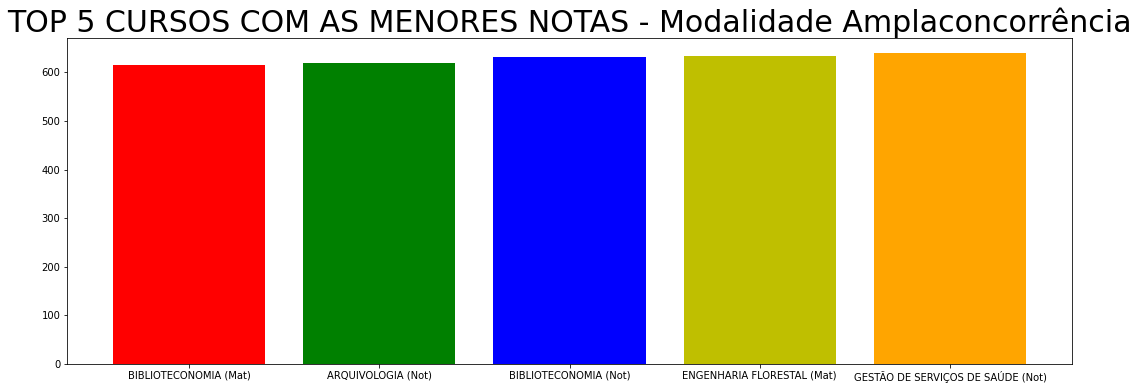

In [ ]:
df_11, mod = top_modalidade("Mínimo", 7)

plt.figure(figsize=(18, 6))
plt.bar(df_11["Curso"], df_11["Mínimo"], color = ["r", "g", "b", "y", "orange"])
plt.title(f"TOP 5 CURSOS COM AS MENORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

### Cotas

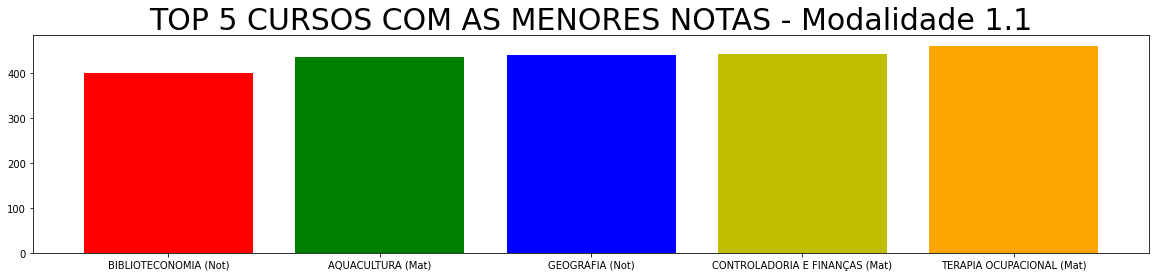

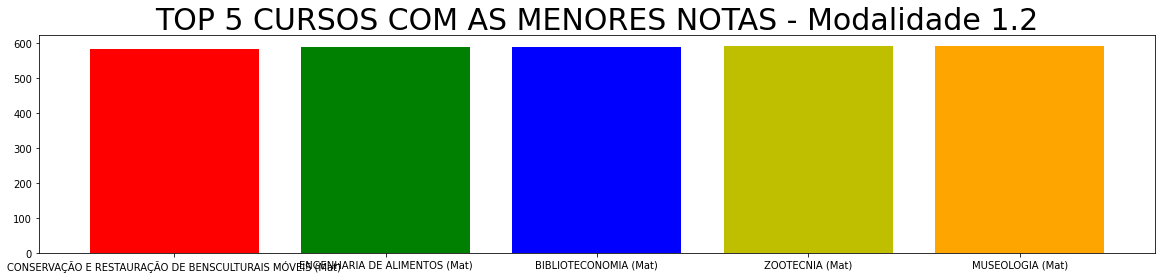

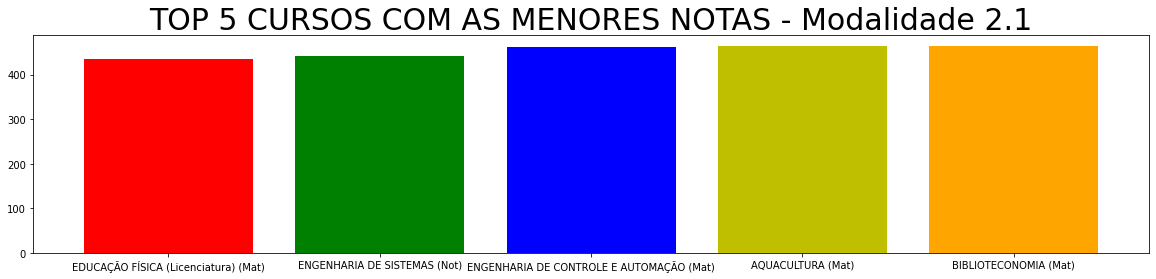

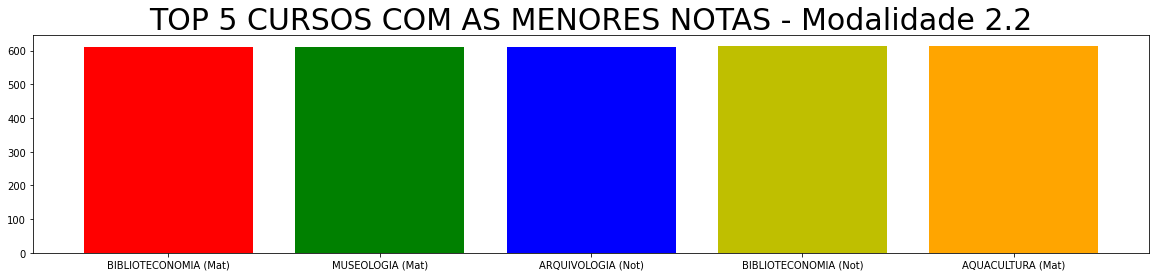

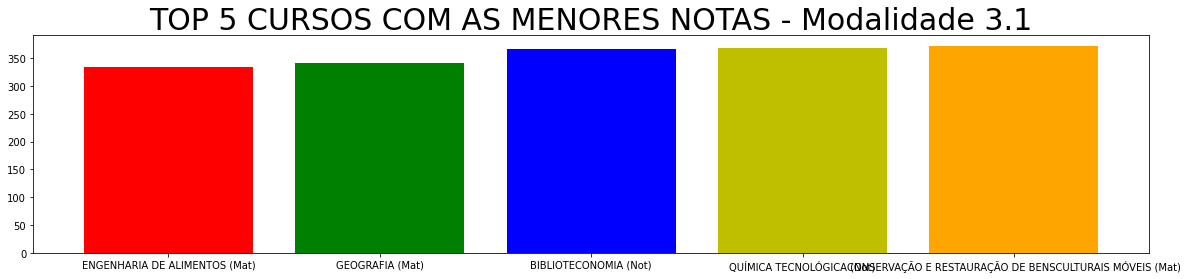

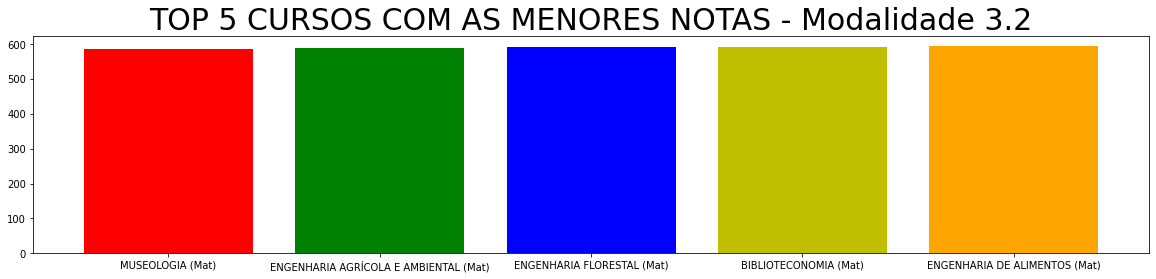

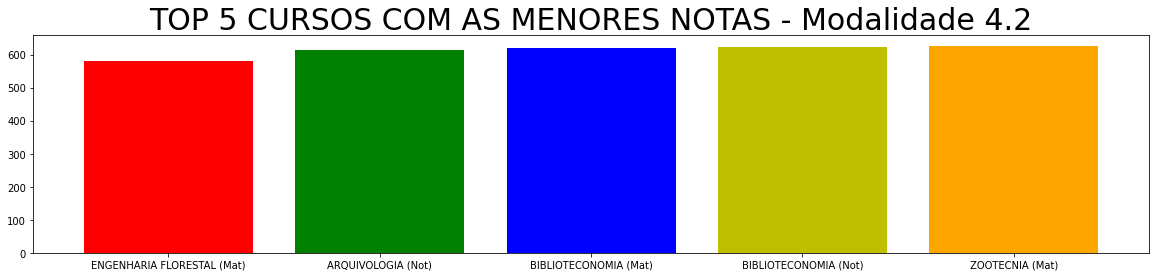

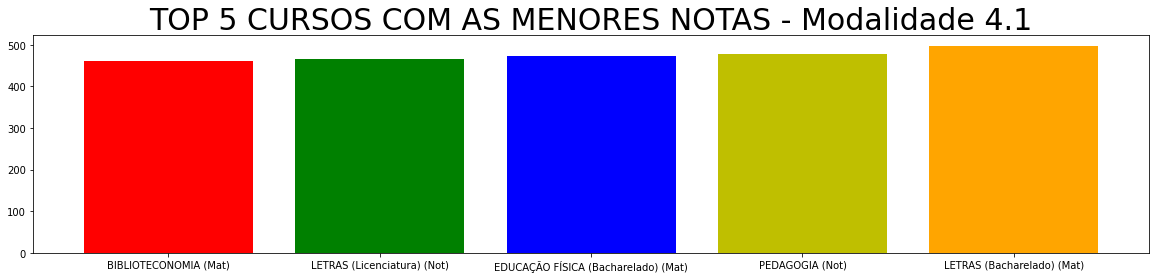

In [ ]:
for cont in range(len(modalidades)):
  if cont != 7:
    df_11, mod = top_modalidade("Mínimo", cont)

    plt.figure(figsize=(20, 4))
    plt.bar(df_11["Curso"], df_11["Mínimo"], color = ["r", "g", "b", "y", "orange"])
    plt.title(f"TOP 5 CURSOS COM AS MENORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

## **4°: Número de cursos Matutinos / Noturnos / Integrais / Vespertinos**

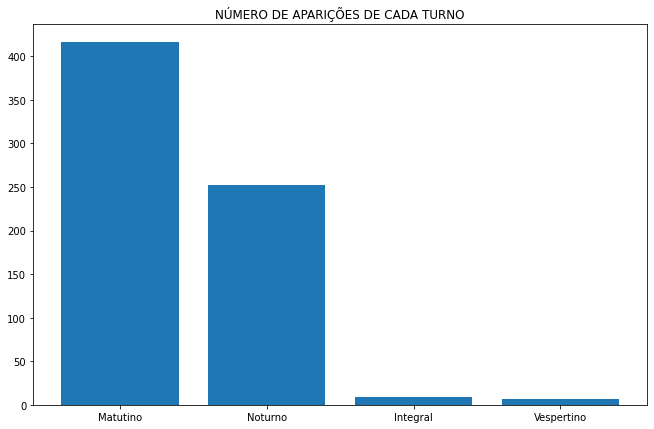

In [20]:
turnos = df["Turno"].value_counts()

y = turnos.values

x = turnos.index

plt.figure(figsize= (11, 7))
plt.bar(x, y)

plt.title("NÚMERO DE APARIÇÕES DE CADA TURNO");